#Домашнее задание

1. Взять все признаки из датасета с урока. Применить модель Random Forest.
2. Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.
3. Посмотрите, как показатели качества соотносятся с коэффициентом корреляции этих признаков и целевого значения, а также между собой.
4. Сравнить показатели качества новой модели с моделью с урока и сделать вывод.


###Инициализация и загрузка данных

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston_data = load_boston()

x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [26]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

###Выбираем наборы признаков

<AxesSubplot:>

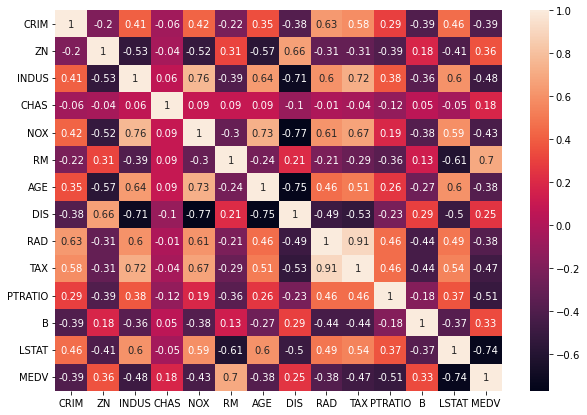

In [27]:
x_corr = x.copy()
x_corr['MEDV'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

In [28]:
features = [['LSTAT','RM'], ['LSTAT','RM', 'PTRATIO'], ['LSTAT','RM', 'PTRATIO', 'TAX'], ['DIS', 'AGE'], ['DIS', 'RAD']]

##Оцениваем результат

In [29]:
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  regr = RandomForestRegressor(n_estimators = 50, random_state = 0)
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metrics = metrics.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)

print(metrics)

C:\Users\Хафизова\AppData\Local\Temp\ipykernel_4680\1583085336.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
C:\Users\Хафизова\AppData\Local\Temp\ipykernel_4680\1583085336.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
C:\Users\Хафизова\AppData\Local\Temp\ipykernel_4680\1583085336.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
C:\Users\Хафизова\AppData\Local\Temp\ipykernel_4680\1583085336.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : 

                    Features MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]  1.603614  4.102255   5.411272  32.677254  0.937006  0.582633
1       [LSTAT, RM, PTRATIO]   1.28854  3.193176   3.778962  18.949349  0.956008  0.757971
2  [LSTAT, RM, PTRATIO, TAX]  1.055411  2.904627   2.424231   15.77793  0.971779  0.798478
3                 [DIS, AGE]  2.784214  6.792598  15.961356  87.750893   0.81419 -0.120789
4                 [DIS, RAD]  2.645833  5.846901  14.833504  67.677076   0.82732  0.135602


C:\Users\Хафизова\AppData\Local\Temp\ipykernel_4680\1583085336.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,


### с RandomForestRegressor разброс по метрикам между тренировочным и тестовым больше чем при линейной регрессии